In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'/content'

In [3]:
df = pd.read_csv('/content/Titanic Dataset.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

▶The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects. Below I have listed the features with a short description:<br>

▶PassengerId is the unique id of the row and it doesn't have any effect on target
Survived is the target variable we are trying to predict (0 or 1):<br>


*   1 = Survived
*   0 = Not Survived

▶Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):<br>


*   1 = Upper class
*   2 = Middle Class
*   3 = Lower Class

▶Name, Sex and Age are self-explanatory <br>
▶SibSp is the total number of the passengers' siblings and spouse<br>
▶Parch is the total number of the passengers' parents and children<br>
▶Ticket is the ticket number of the passenger<br>
▶Fare is the passenger fare<br>
▶Cabin is the cabin number of the passenger<br>
▶Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):


*   C = Cherbourg
*   Q = Queenstown
*   S = Southampton





In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
print(df['Age'].isnull().sum()/len(df) * 100)
print(df['Cabin'].isnull().sum()/len(df) * 100)

19.865319865319865
77.10437710437711


Cabin features have 77% null values,in my suggestions is better to delete the feature.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Q - How many survived?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


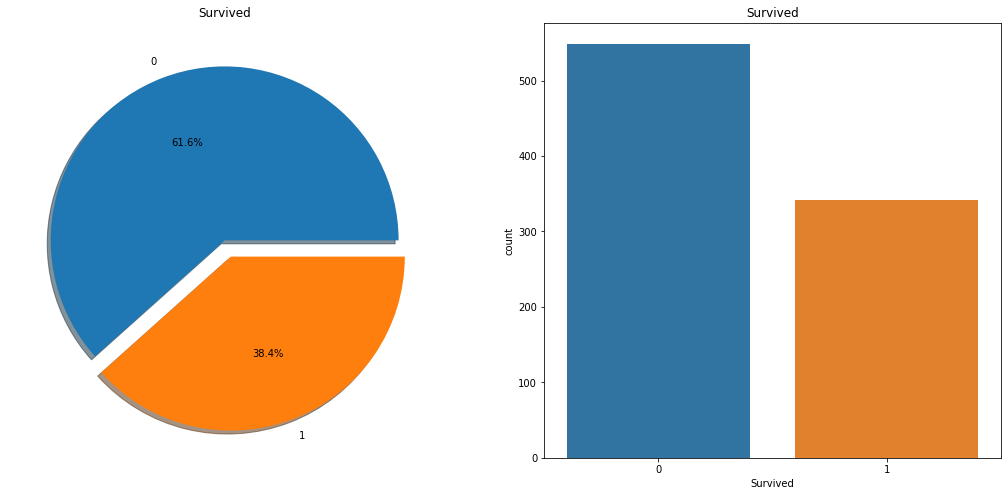

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('Survived') 
ax[0].set_ylabel('')

sns.countplot('Survived',data=df,ax=ax[1])

ax[1].set_title('Survived') 

plt.show()



*   1 = Survived
*   0 = Not Survived




In [21]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [25]:
# we are drop unnecessary cols
cols = ['Cabin','Name','PassengerId']
df.drop(cols,axis=1, inplace=True)

In [26]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.25,S


In [29]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [31]:
# importing modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [32]:
# initializing module
my_imputer = SimpleImputer()

imp = pd.get_dummies(X)

imp_data = my_imputer.fit_transform(imp)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(imp_data, y, test_size=0.10, random_state=1)

# Logistic Regression

logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

p_lr = logmodel.predict(x_test)

print("accuracy_score = ",accuracy_score(y_test, predictions))
print("confusion_matrix = \n",confusion_matrix(y_test, predictions))
print("classification_report = \n",classification_report(y_test, predictions))

accuracy_score =  0.7666666666666667
confusion_matrix = 
 [[47  6]
 [15 22]]
classification_report = 
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        53
           1       0.79      0.59      0.68        37

    accuracy                           0.77        90
   macro avg       0.77      0.74      0.75        90
weighted avg       0.77      0.77      0.76        90



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [38]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
p_dt = clf.predict(x_test)

print("accuracy_score = ",accuracy_score(y_test, predictions))
print("confusion_matrix = \n",confusion_matrix(y_test, predictions))
print("classification_report = \n",classification_report(y_test, predictions))

accuracy_score =  0.7666666666666667
confusion_matrix = 
 [[47  6]
 [15 22]]
classification_report = 
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        53
           1       0.79      0.59      0.68        37

    accuracy                           0.77        90
   macro avg       0.77      0.74      0.75        90
weighted avg       0.77      0.77      0.76        90



In [37]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier


rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

p_rf = rfc.predict(x_test)

print("accuracy_score = ",accuracy_score(y_test, predictions))
print("confusion_matrix = \n",confusion_matrix(y_test, predictions))
print("classification_report = \n",classification_report(y_test, predictions))


accuracy_score =  0.7666666666666667
confusion_matrix = 
 [[47  6]
 [15 22]]
classification_report = 
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        53
           1       0.79      0.59      0.68        37

    accuracy                           0.77        90
   macro avg       0.77      0.74      0.75        90
weighted avg       0.77      0.77      0.76        90



In [40]:
performance = {'LogReg':accuracy_score(y_test,p_lr),
               'Decision Tree':accuracy_score(y_test,p_dt),
               'Random Forest':accuracy_score(y_test,p_rf)}

res = pd.DataFrame(performance,index=['Accuracy'])

In [41]:
res

,LogReg,Decision Tree,Random Forest
Accuracy,0.788889,0.8,0.777778


Decision tree is giving acccuracy of 80% percent.
